In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

In [3]:
nrows = 100
ncols = 5

array = np.empty((nrows, ncols))
array.fill(np.nan)
array[0, :] = np.random.random(ncols)
array[:, 0] = np.random.random(nrows)
array[0:6]

array([[0.55658335, 0.93351177, 0.603568  , 0.0057663 , 0.48707665],
       [0.99000798,        nan,        nan,        nan,        nan],
       [0.48052789,        nan,        nan,        nan,        nan],
       [0.45394428,        nan,        nan,        nan,        nan],
       [0.01257197,        nan,        nan,        nan,        nan],
       [0.83901992,        nan,        nan,        nan,        nan]])

In [4]:
p = 0.5
n = nrows
cols = np.random.geometric(p, n)
cols[cols >= ncols] = 0
cols

array([2, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 3, 3, 1, 1, 3, 2, 2, 0, 1, 2, 1, 2, 1, 1, 4, 2, 2,
       1, 0, 1, 2, 2, 3, 2, 3, 4, 2, 1, 0, 4, 1, 3, 1, 3, 2, 1, 2, 0, 1,
       0, 1, 0, 2, 3, 1, 1, 1, 2, 1, 3, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 4, 3, 2, 0, 1, 0, 1, 1])

In [5]:
rows = np.random.randint(nrows, size=n)
rows

array([21, 72, 29,  1, 42, 31,  9, 80, 62, 53, 67, 14, 20, 36, 33, 65, 56,
       78, 39, 39, 16, 20,  1, 82, 96, 25, 15, 97, 26, 13,  8, 64, 11,  7,
        8, 38, 98, 76,  2, 21, 54,  8, 85, 23, 70, 81, 69, 32, 92,  5, 41,
       94, 89, 24, 42, 51, 61, 42, 98, 96, 61, 35, 73, 20, 77, 42, 27, 95,
       83, 91, 22, 70, 63, 60, 27,  8, 75, 29, 57, 90, 78, 73, 80, 47, 70,
       92, 87, 55, 29, 23, 53, 21, 15, 80, 39,  6, 32, 62, 24, 78])

In [6]:
array[rows, cols] = np.random.random(n)
array[0:6]

array([[0.55658335, 0.93351177, 0.603568  , 0.0057663 , 0.48707665],
       [0.99000798,        nan, 0.86673135, 0.0229488 ,        nan],
       [0.48052789,        nan, 0.21236028,        nan,        nan],
       [0.45394428,        nan,        nan,        nan,        nan],
       [0.01257197,        nan,        nan,        nan,        nan],
       [0.83901992,        nan,        nan, 0.7168289 ,        nan]])

In [7]:
import pandas as pd
df = pd.DataFrame(array)
df.head()

,0,1,2,3,4
0,0.556583,0.933512,0.603568,0.005766,0.487077
1,0.990008,NaN,0.866731,0.022949,NaN
2,0.480528,NaN,0.212360,NaN,NaN
3,0.453944,NaN,NaN,NaN,NaN
4,0.012572,NaN,NaN,NaN,NaN


In [8]:
filled = df.fillna(method='ffill', axis=0)
filled.head()

,0,1,2,3,4
0,0.556583,0.933512,0.603568,0.005766,0.487077
1,0.990008,0.933512,0.866731,0.022949,0.487077
2,0.480528,0.933512,0.212360,0.022949,0.487077
3,0.453944,0.933512,0.212360,0.022949,0.487077
4,0.012572,0.933512,0.212360,0.022949,0.487077


In [9]:
total = filled.sum(axis=1)
total.head()

0    2.586506
1    3.300277
2    2.136425
3    2.109842
4    1.668469
dtype: float64

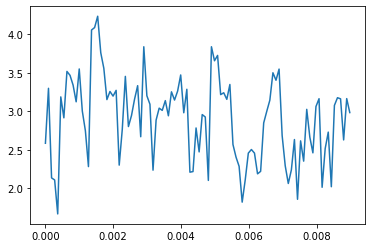

In [10]:
from thinkdsp import Wave

wave = Wave(total.values)
wave.plot()

In [11]:
def voss(nrows, ncols=16):
    """Generates pink noise using the Voss-McCartney algorithm.
    
    nrows: number of values to generate
    rcols: number of random sources to add
    
    returns: NumPy array
    """
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    
    # the total number of changes is nrows
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values

In [12]:
ys = voss(11025)
ys

array([7.31868346, 7.63226515, 7.27862766, ..., 6.50176404, 7.01310755,
       6.49456021])

In [13]:
wave = Wave(ys)
wave.unbias()
wave.normalize()

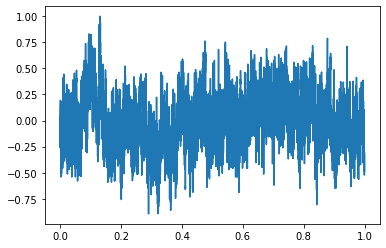

In [14]:
wave.plot()

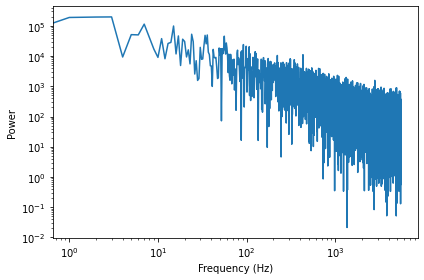

In [15]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)',ylabel='Power',**loglog)

In [16]:
spectrum.estimate_slope().slope

-0.994970471051145